In [1]:
using Printf, DelimitedFiles
using Plots
using DataFrames
using Revise, MDToolbox

In [2]:
#using BSON: @save, @load
#@load "df.bson" df

In [3]:
using JLD2

df = load("df.jld2")["df"]

Row,fnames,score,omega,phi,prou,d,struc
,Any,Any,Any,Any,Any,Any,Any
1,1/complex.1.pdb,1476.6,"[-0.173076, -0.791418, -0.586261]",72.632,"[53.6754, 11.9727, -32.0085]",0.846014,"1x2258 TrjArray{Float64, Int64}\n| 93.66 54.74 -5.40 | … 74.34 37.26 3.22 |"
2,1/complex.2.pdb,1434.06,"[0.546049, -0.425146, 0.721859]",154.985,"[68.9845, 72.8023, -9.30562]",-22.2624,"1x2258 TrjArray{Float64, Int64}\n| 93.66 54.74 -5.40 | … 67.70 97.60 -9.68 |"
3,1/complex.3.pdb,1433.56,"[0.0914852, 0.842105, 0.531497]",67.053,"[58.1435, 10.2176, -26.1969]",2.98047,"1x2258 TrjArray{Float64, Int64}\n| 93.66 54.74 -5.40 | … 58.00 58.68 -18.17 |"
4,1/complex.4.pdb,1358.04,"[0.415051, 0.536264, -0.734951]",169.218,"[32.2834, 45.9905, 51.7889]",-6.48095,"1x2258 TrjArray{Float64, Int64}\n| 93.66 54.74 -5.40 | … 36.32 111.19 15.44 |"
5,1/complex.5.pdb,1341.26,"[-0.348243, -0.511949, 0.785261]",161.249,"[39.1631, 51.1556, 50.7187]",-6.61469,"1x2258 TrjArray{Float64, Int64}\n| 93.66 54.74 -5.40 | … 59.19 121.57 15.42 |"
6,1/complex.6.pdb,1322.27,"[-0.62595, -0.691659, -0.36027]",174.545,"[26.2185, -3.30103, -39.2159]",-0.118216,"1x2258 TrjArray{Float64, Int64}\n| 93.66 54.74 -5.40 | … 73.19 51.31 -7.41 |"
7,1/complex.7.pdb,1309.68,"[0.230504, -0.969612, -0.0819839]",166.598,"[81.6898, 20.3154, -10.5903]",31.5404,"1x2258 TrjArray{Float64, Int64}\n| 93.66 54.74 -5.40 | … 80.54 17.75 -4.07 |"
8,1/complex.8.pdb,1304.88,"[0.526833, 0.760823, 0.378939]",175.718,"[37.3555, -6.36759, -39.1501]",1.80582,"1x2258 TrjArray{Float64, Int64}\n| 93.66 54.74 -5.40 | … 75.64 50.95 -7.34 |"
9,1/complex.9.pdb,1285.13,"[0.128234, 0.306095, -0.943325]",178.053,"[55.6515, 70.5797, 30.4672]",-0.0974977,"1x2258 TrjArray{Float64, Int64}\n| 93.66 54.74 -5.40 | … 42.34 113.89 1.62 |"


In [4]:
sort!(df, [:score], rev=true);
#dfs = vcat(df, df)
#sort!(dfs, [:score], rev=true)

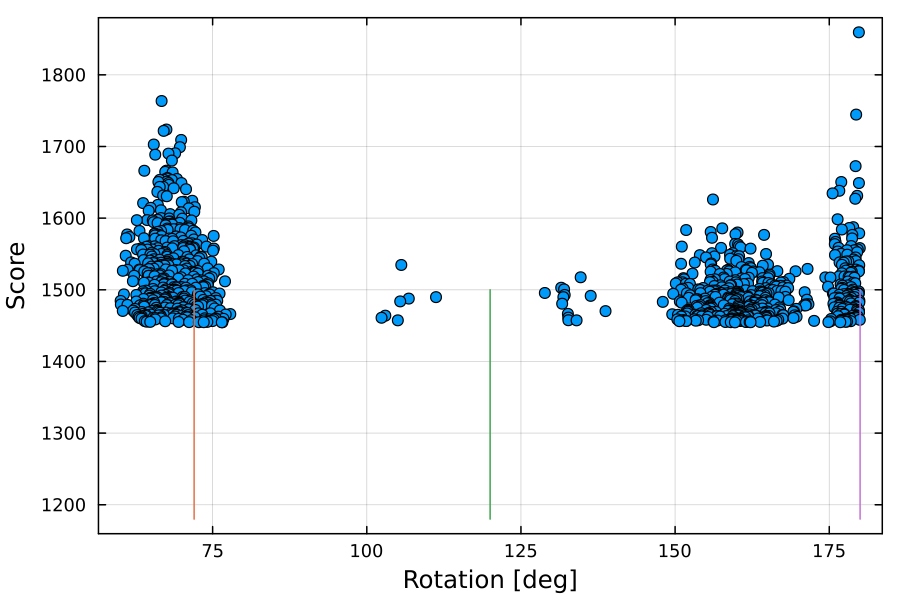

In [5]:
#pyplot()
plot(df.phi[1:1000], df.score[1:1000], seriestype=:scatter, dpi=250, label=nothing, box_style=:box)
xaxis!("Rotation [deg]"); yaxis!("Score")
#s = collect(970:1350)
s = collect(1180:1500)
plot!(fill(360/5, length(s)), s, label=nothing, dpi=250)
plot!(fill(360/3, length(s)), s, label=nothing, dpi=250)
plot!(fill(360/2, length(s)), s, label=nothing, dpi=150)

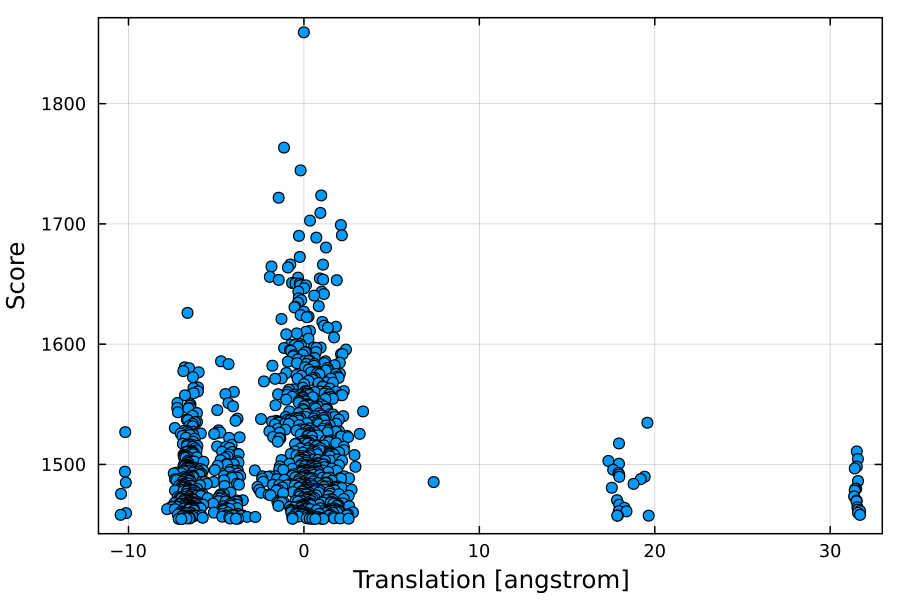

In [6]:
#pyplot()
plot(df.d[1:1000], df.score[1:1000], seriestype=:scatter, dpi=150, label=nothing, box_style=:box)
xaxis!("Translation [angstrom]"); yaxis!("Score")

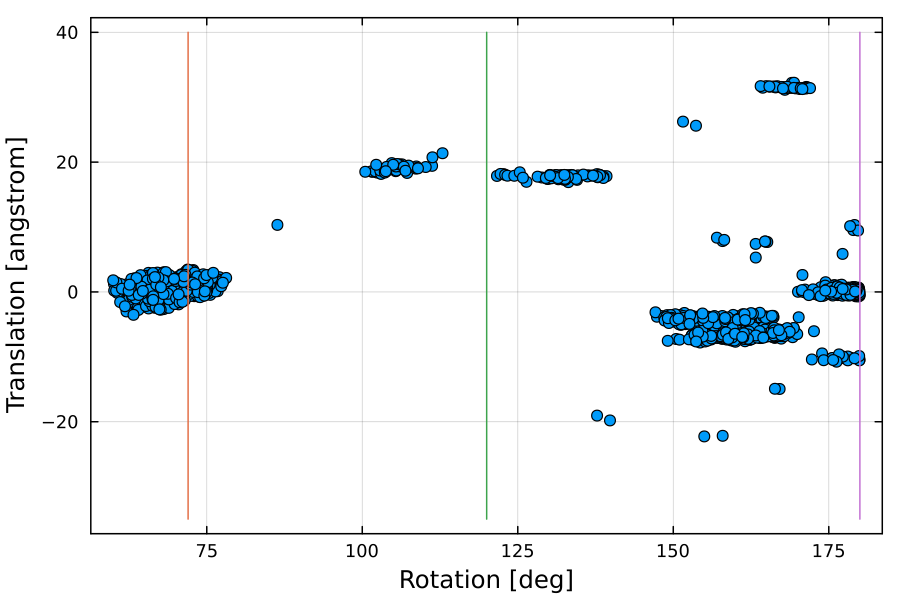

In [7]:
#pyplot()
plot(df.phi[1:2000], df.d[1:2000], seriestype=:scatter, dpi=150, label=nothing, box_style=:box)
xaxis!("Rotation [deg]"); yaxis!("Translation [angstrom]")
s = collect(-35:40)
plot!(fill(360/5, length(s)), s, label=nothing, dpi=250)
plot!(fill(360/3, length(s)), s, label=nothing, dpi=250)
plot!(fill(360/2, length(s)), s, label=nothing, dpi=150)

In [8]:
function create_heatmap(x, y, z, nx, ny)
    A = zeros(Float64, ny, nx)
    A .= -Inf64
    #edge_x = range(minimum(x), maximum(x), nx+1)
    edge_x = range(20, 190, nx+1)
    edge_y = range(minimum(y), maximum(y), ny+1)
    for ix in 1:nx
        for iy in 1:ny
            id_x = edge_x[ix] .<= x .< edge_x[ix+1]
            id_y = edge_y[iy] .<= y .< edge_y[iy+1]
            id = id_x .& id_y
            if !isempty(z[id])
                A[iy, ix] = maximum(z[id])
            end
        end
    end
    grid_x = edge_x[1:end-1] .+ (0.5 * (edge_x[2] - edge_x[1])) .+ (edge_x[2] - edge_x[1])
    grid_y = edge_y[1:end-1] .+ (0.5 * (edge_y[2] - edge_y[1])) .+ (edge_y[2] - edge_y[1])    
    return (z=A, x=grid_x, y=grid_y)
end

create_heatmap (generic function with 1 method)

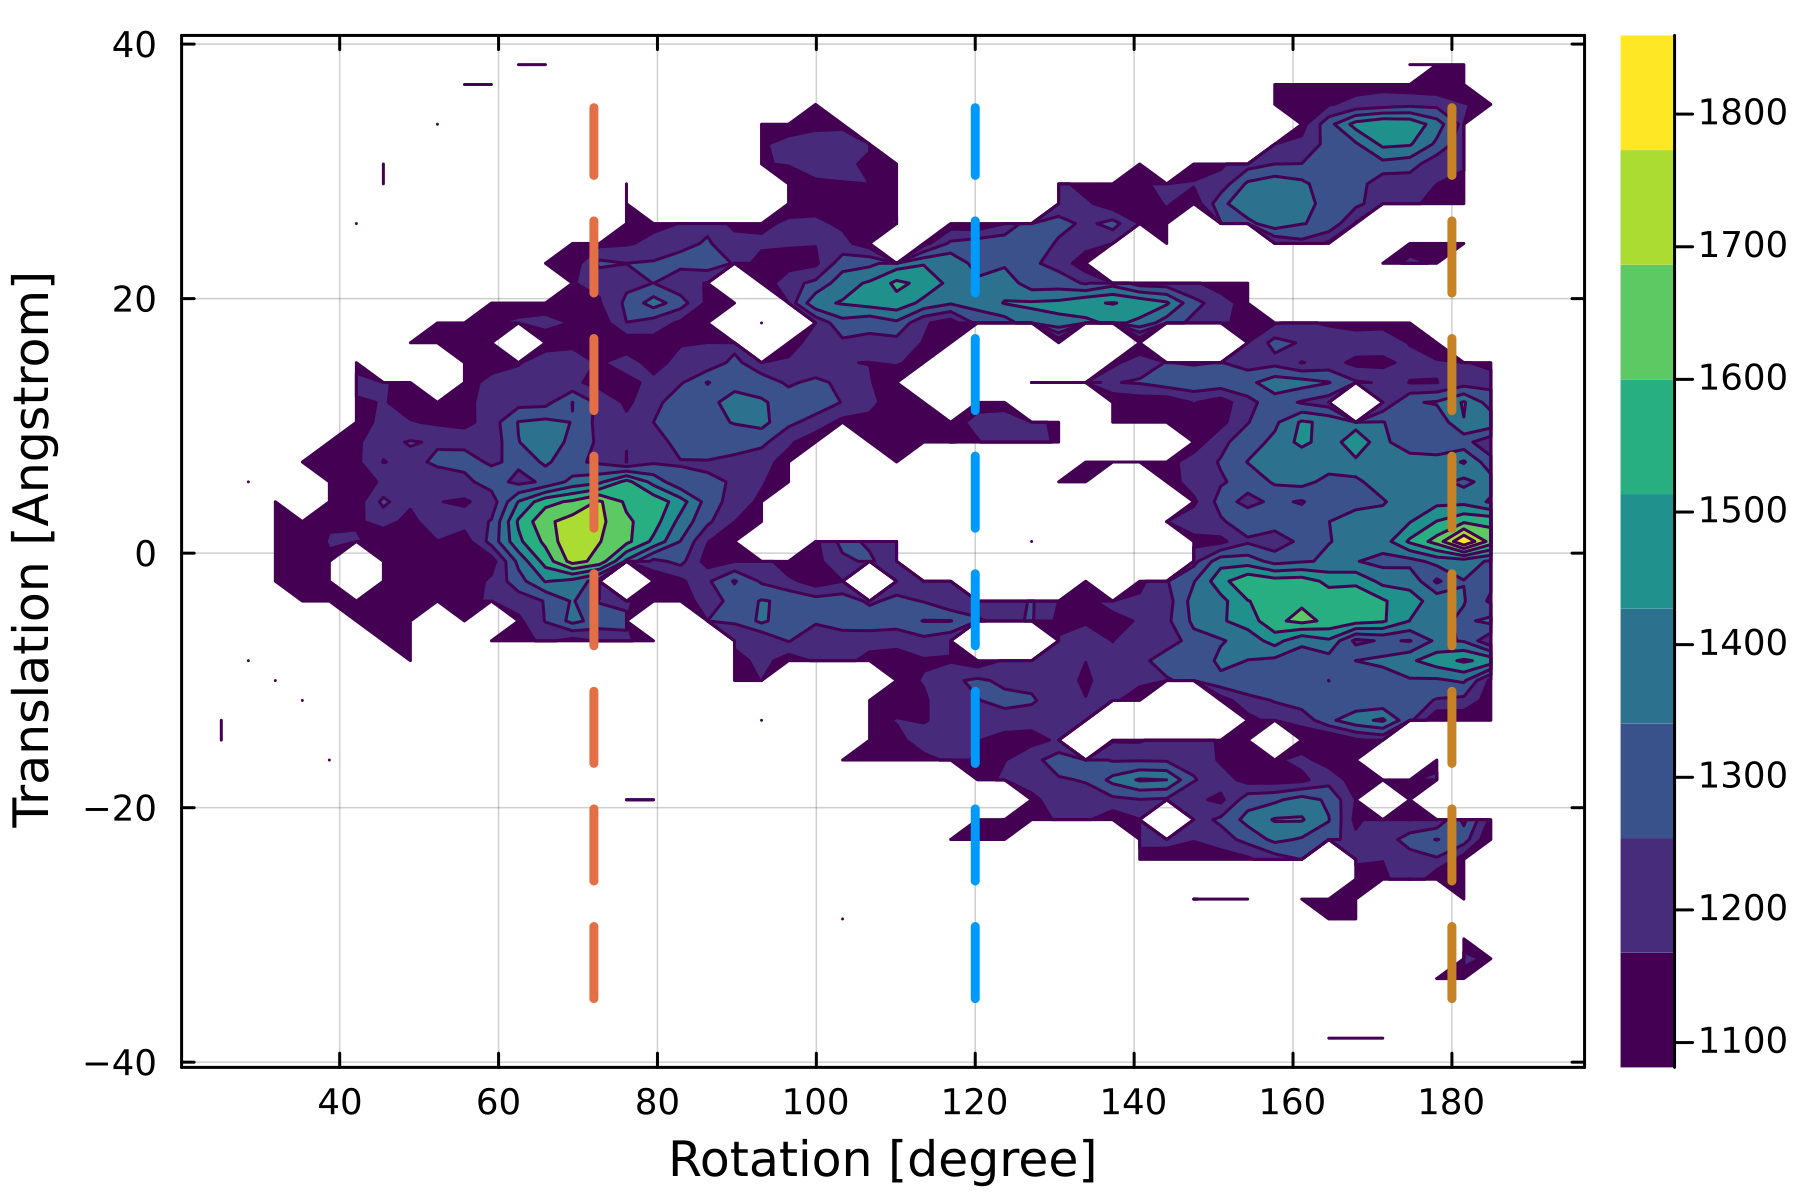

In [25]:
n = 100000
F = create_heatmap(df.phi[1:n], df.d[1:n], df.score[1:n], 50, 50)
p = plot(F.x, F.y, F.z, framestyle=:box, dpi=300, c=:viridis,  
     st=:contourf, levels=range(minimum(F.z[F.z .> -Inf]), maximum(F.z), 10))
xlabel!("Rotation [degree]")
ylabel!("Translation [Angstrom]")

s = collect(-35:35)
plot!(fill(360/5, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=2, label=nothing)
plot!(fill(360/3, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=1, label=nothing)
plot!(fill(360/2, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=24, label=nothing)

In [26]:
savefig(p, "heatmap_score.png")
savefig(p, "heatmap_score.pdf")

"/data3/yasu/capsid/docking_pairwise/4v7g_zdock_iter/heatmap_score.pdf"

In [11]:
function create_heatmap_min(x, y, z, nx, ny)
    A = zeros(Float64, ny, nx)
    A .= -Inf64
    #edge_x = range(minimum(x), maximum(x), nx+1)
    edge_x = range(20, 190, nx+1)
    edge_y = range(minimum(y), maximum(y), ny+1)
    for ix in 1:nx
        for iy in 1:ny
            id_x = edge_x[ix] .<= x .< edge_x[ix+1]
            id_y = edge_y[iy] .<= y .< edge_y[iy+1]
            id = id_x .& id_y
            if !isempty(z[id])
                A[iy, ix] = minimum(z[id])
            end
        end
    end
    grid_x = edge_x[1:end-1] .+ (0.5 * (edge_x[2] - edge_x[1])) .+ (edge_x[2] - edge_x[1])
    grid_y = edge_y[1:end-1] .+ (0.5 * (edge_y[2] - edge_y[1])) .+ (edge_y[2] - edge_y[1])    
    return (z=A, x=grid_x, y=grid_y)
end

create_heatmap_min (generic function with 1 method)

In [12]:
using Combinatorics

function compute_rmsd_permute(ref, t, nmer)
    natom = Int(t.natom / nmer)
    nmer_ref = Int(ref.natom / natom)
    index_pairs = collect(permutations(1:nmer_ref, nmer))
    rmsd = Inf64
    for index in index_pairs
        id = Vector{Int}(undef, 0)
        for imer = 1:nmer
            id = [id; (natom*(index[imer]-1)+1):(natom * index[imer])]
        end
        ref2 = ref[:, id]
        t2 = superimpose(ref2, t)
        r = compute_rmsd(ref2, t2)
        if r[1] < rmsd
            rmsd = r[1]
        end
    end
    return rmsd
end

compute_rmsd_permute (generic function with 1 method)

In [13]:
t = mdload("ref.pdb")
#t = t["atomname CA"]
ref = t[1, :]
for imer = 2:60
    ref = hcat(ref, t[imer, :])
end
ref

1x9120 TrjArray{Float64, Int64}
| A                          |  …   A                          |
| 2VAL                       |  …   153ALA                     |
| 2CA                        |  …   67501CA                    |
|    14.75   -54.97   -44.03 |  …     -53.51    -0.81    58.61 |

In [14]:
function read_ascii(fname)
    lines = readlines(fname)
    natom = length(lines) - 1
    xyz = zeros(Float64, 1, natom*3)
    for i = 1:natom
        xyz[1, 3*(i-1)+1] = parse(Float64, lines[i+1][31:38])
        xyz[1, 3*(i-1)+2] = parse(Float64, lines[i+1][39:46])
        xyz[1, 3*(i-1)+3] = parse(Float64, lines[i+1][47:54])
    end
    TrjArray(xyz=xyz)
end

read_ascii (generic function with 1 method)

In [20]:
ntop = 3000
rmsd = zeros(Float64, ntop)
t = mdload("1/complex.1.pdb")
id = select_atom(t, "atomname CA")

for i in 1:ntop
    filename = df.fnames[i]
    t = read_ascii(filename)
    t_ca = t[:, id]
    rmsd[i] = compute_rmsd_permute(ref, t_ca, 2)
end

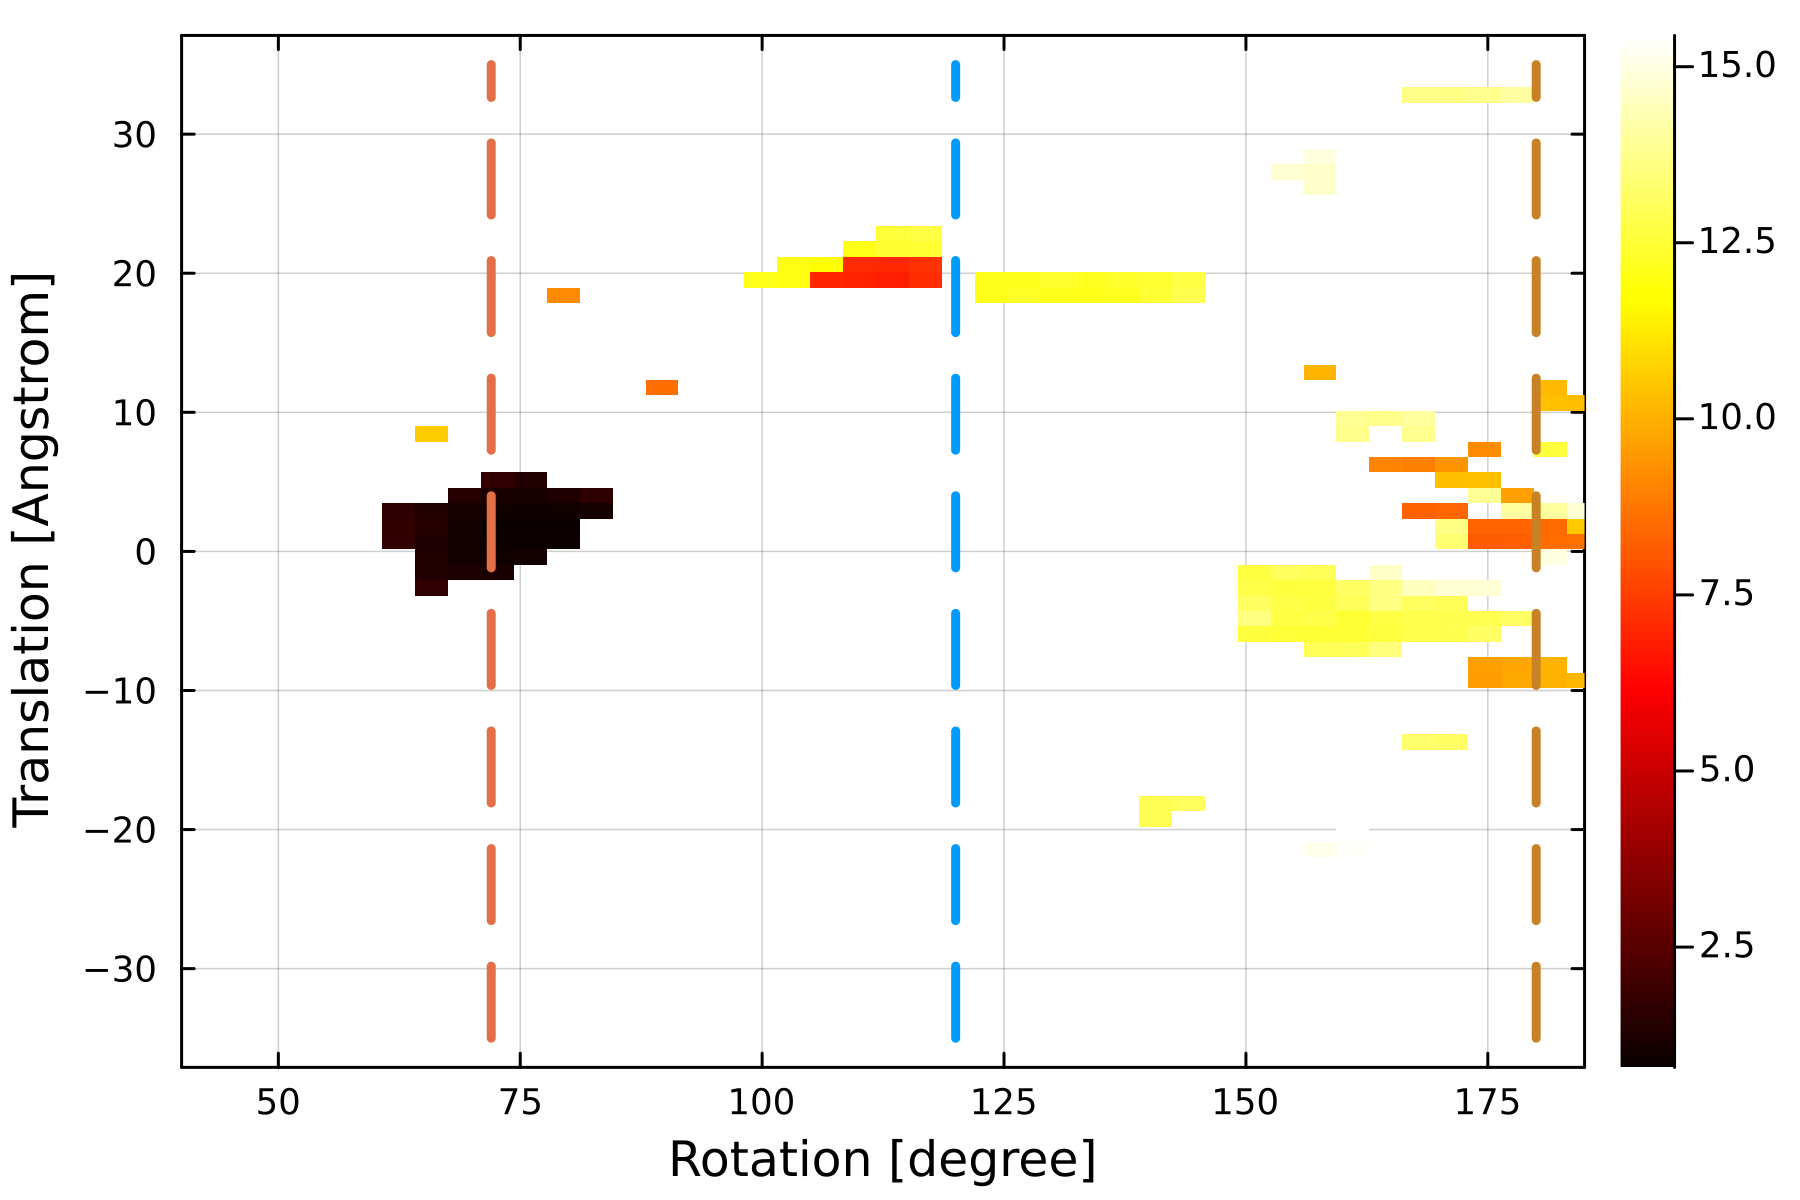

In [27]:
F = create_heatmap_min(df.phi[1:ntop], df.d[1:ntop], rmsd[1:ntop], 50, 50)
p = plot(F.x, F.y, F.z, framestyle=:box, dpi=300, c=:hot,  
     st=:heatmap, levels=range(0, maximum(F.z), 10), xlim=(40, 185))
xlabel!("Rotation [degree]")
ylabel!("Translation [Angstrom]")

s = collect(-35:35)
plot!(fill(360/5, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=2, label=nothing)
plot!(fill(360/3, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=1, label=nothing)
plot!(fill(360/2, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=24, label=nothing)

In [28]:
savefig(p, "heatmap_rmsd.png")
savefig(p, "heatmap_rmsd.pdf")

"/data3/yasu/capsid/docking_pairwise/4v7g_zdock_iter/heatmap_rmsd.pdf"

In [23]:
using JLD2

save("rmsd.jld2", "rmsd", rmsd)

In [24]:
pwd()

"/data3/yasu/capsid/docking_pairwise/4v7g_zdock_iter"